In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from langchain.pydantic_v1 import BaseModel
from dataclasses import dataclass

In [13]:
class TypeDictState(TypedDict):
    name: str
    mood: Literal["happy", "sad"]


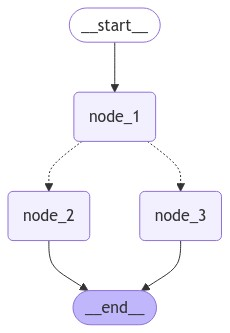

In [16]:
import random
from IPython.display import display, Image

def node1(state):
    print("node1")
    return {"name" : state["name"] + " is...."}

def node2(state):
    print("node2")
    return {"mood" : "happy"}

def node3(state):
    print("node3")
    return {"mood" : "sad"}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    return "node_3"

builder = StateGraph(TypeDictState)

builder.add_node("node_1", node1)
builder.add_node("node_2", node2)
builder.add_node("node_3", node3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [18]:
graph.invoke({"name" : "Hijabie"})

node1
node2


{'name': 'Hijabie is....', 'mood': 'happy'}

In [19]:
@dataclass
class DataClassesState:
    name: str
    mood: Literal["happy", "sad"]

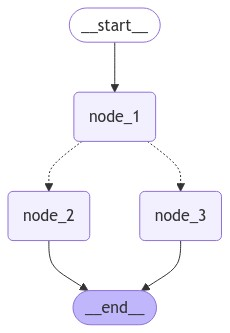

In [20]:
def node1(state):
    print("Node1")
    return {"name" : state.name + "is........."}

builder = StateGraph(DataClassesState)

builder.add_node("node_1", node1)
builder.add_node("node_2", node2)
builder.add_node("node_3", node3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
graph.invoke(DataClassesState(name="Hijabie", mood="happy"))

Node1
node2


{'name': 'Hijabieis.........', 'mood': 'happy'}

In [24]:
from langchain.pydantic_v1 import validator, ValidationError

class PydanticState(BaseModel):
    name: str
    mood: Literal["happy", "sad"]

    @validator("mood")
    def validator_mood(cls, value):
        if value not in ["happy", "sad"]:
            raise ValidationError("Mood must be either 'happy' or 'sad'")
        return value

try:
    state = PydanticState(name="John", mood="tired")
except ValidationError as e:
    print(f"Validation error: {e}")

Validation error: 1 validation error for PydanticState
mood
  unexpected value; permitted: 'happy', 'sad' (type=value_error.const; given=tired; permitted=('happy', 'sad'))


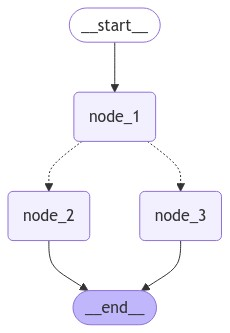

In [25]:
builder = StateGraph(PydanticState)

builder.add_node("node_1", node1)
builder.add_node("node_2", node2)
builder.add_node("node_3", node3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke(PydanticState(name="HIjabie", mood="tired"))

ValidationError: 1 validation error for PydanticState
mood
  unexpected value; permitted: 'happy', 'sad' (type=value_error.const; given=tired; permitted=('happy', 'sad'))